In [1]:
# First import
import os, sys
print("First import completed.")

# Second import
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

print("Second import completed.")

# Set config
# TEST_DIR = os.path.realpath(os.path.join(os.getcwd(), '..', 'test'))
DATA_DIR = 'D:\\Git Repository\\_local_data_\\DLW\\Orats\\'
# DATA_CLEAN_DIR = 'd:\\jupyter\\wooji\\repository\\Utils'

pd.set_option('display.max_rows', 500)
plt.style.use('seaborn')

# sys.path.append(TEST_DIR)
sys.path.append(DATA_DIR)
# sys.path.append(DATA_CLEAN_DIR)
print('Config all set.')

from read_option_data import *
from workers import *
# from anomaly_detection_helper import train_test_split
# import pickle
# import seaborn as sns
print("Third import completed.")


First import completed.
Second import completed.
Config all set.
Third import completed.


In [2]:
start_date = '20210703'
end_date = '20210915'
ticker = ['SPX']
# optionsdata = readMultiDay(DATA_DIR, start_date, end_date, ticker=['TSLA'])


In [3]:
def expiry_contract(df, _expiry):
    """
    return expiry in current/next/3rd month filter
    """
    expiration, quotedate = df['expiration'], df['quotedate']
    timedelta = (expiration - quotedate).dt.days

    if _expiry == 'cur':
        return timedelta <= 30
    if _expiry == 'next':
        return (timedelta <= 60) & (timedelta >= 30)
    if _expiry == 'third':
        return (timedelta <= 90) & (timedelta >= 60)

In [4]:
def get_volume(folder_path, start_date, end_date, ticker, expiry_period = 'cur', delta_thres = [0.75, 0.25], opt_type = 'put'):
    
    dateList = [d.strftime('%Y%m%d') for d in pd.date_range(start_date, end_date)]
    volume_list = []
    date_list = []
    for d in dateList:
        try:
            df = cleanDF(readDayCsv(folder_path, d), ticker)
            print('pass')
            volume = df[(expiry_contract(df, expiry_period)) & (abs(df.delta) <= delta_thres[0]) & (abs(df.delta) >= delta_thres[1]) & (df.type == opt_type)]['volume'].sum()
            volume_list.append(volume)
            date_list.append(d)
        except:
            print(f'{d} is not a trading day.')
    
    return volume_list

In [8]:
option_volume_list = get_volume(DATA_DIR, start_date, end_date, ticker, expiry_period = 'cur', delta_thres = [0.35, 0], opt_type = 'put')

20210703 is not a trading day.
20210704 is not a trading day.
20210705 is not a trading day.
pass
pass
pass
pass
20210710 is not a trading day.
20210711 is not a trading day.
pass
pass
pass
pass
pass
20210717 is not a trading day.
20210718 is not a trading day.
pass
pass
pass
pass
pass
20210724 is not a trading day.
20210725 is not a trading day.
pass
pass
pass
pass
pass
20210731 is not a trading day.
20210801 is not a trading day.
pass
pass
pass
pass
pass
20210807 is not a trading day.
20210808 is not a trading day.
20210809 is not a trading day.
pass
pass
pass
pass
20210814 is not a trading day.
20210815 is not a trading day.
pass
pass
pass
pass
pass
20210821 is not a trading day.
20210822 is not a trading day.
pass
pass
pass
pass
pass
20210828 is not a trading day.
20210829 is not a trading day.
pass
pass
pass
pass
pass
20210904 is not a trading day.
20210905 is not a trading day.
20210906 is not a trading day.
pass
pass
pass
pass
20210911 is not a trading day.
20210912 is not a tra

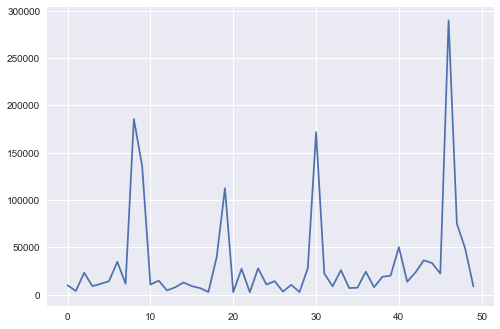

In [9]:
plt.plot(option_volume_list)

<AxesSubplot:>

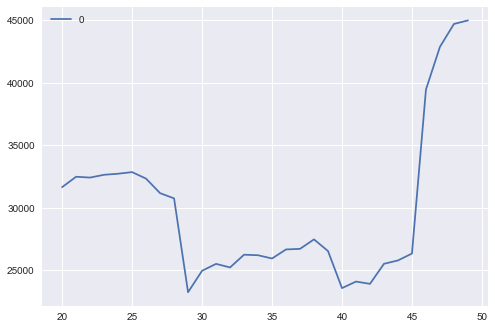

In [13]:
option_volume_df = pd.DataFrame(option_volume_list)
option_volume_df.rolling(21).mean().plot()

In [ ]:
stock_df = get_all_price(ticker, '2021-09-03', '2021-09-16')

In [ ]:
plt.plot(stock_df.index, price_vec, label = 'Option')
plt.plot(stock_df.close, label = 'Underlying')
plt.legend()
plt.show()